Data Head:
  Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0     None            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  ...   Latitude   Longitude Population  \


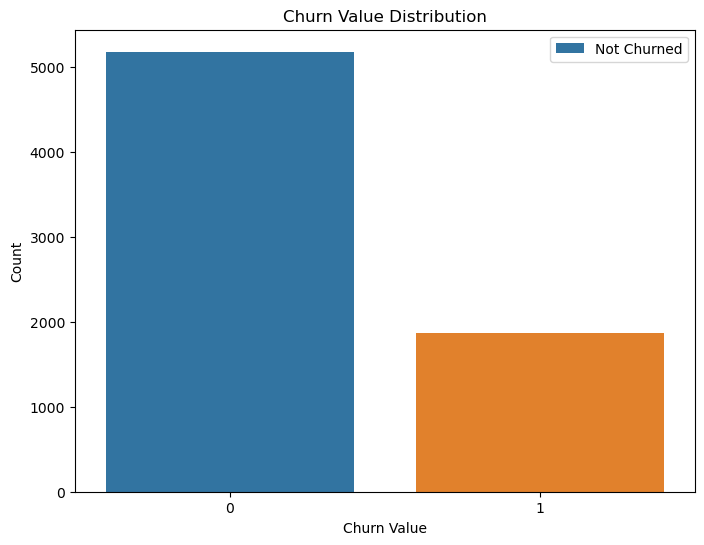

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Understanding the Problem
# Provided in the problem statement

# Step 2: Data Acquisition and Exploration
# Load the dataset
data = pd.read_csv('telco_churn_data.csv')

# Explore the dataset
print("Data Head:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nChurn Value Distribution:")
print(data['Churn Value'].value_counts())
print("\nSummary Statistics for Numerical Features:")
print(data.describe())
print("\nUnique values for Categorical Features:")
for column in data.select_dtypes(include=['object']).columns:
    print(column, ":", data[column].unique())

# Visualization for Data Wrangling and EDA
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Value', data=data)
plt.title('Churn Value Distribution')
plt.xlabel('Churn Value')
plt.ylabel('Count')

# Add legend
plt.legend(labels=['Not Churned', 'Churned'])

plt.show()

# Step 3: Data Preprocessing
# Handle missing values
# Example of handling missing values for numerical features with median
numerical_features = data.select_dtypes(include=['int', 'float']).columns
for feature in numerical_features:
    data[feature].fillna(data[feature].median(), inplace=True)

# Example of handling missing values for categorical features with the most frequent category
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data)

# Step 4: Feature Selection
# You might use domain knowledge, correlation analysis, or feature importance techniques to select relevant features
# Example of using correlation analysis to select features
correlation_matrix = data.corr()
relevant_features = correlation_matrix['Churn Value'].sort_values(ascending=False).head(10).index.tolist()

# Visualization: Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# Step 5: Model Development
# Split data into train and test sets
X = data[relevant_features]
y = data['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Model Interpretation
# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['Importance'])
print("Feature Importance:")
print(feature_importances.sort_values(by='Importance', ascending=False))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Step 8: Recommendations
# Based on insights from the model, devise tailored strategies to retain customers
# Example: Offer discounts to customers with high churn likelihood, improve customer service for certain segments, etc.
